In [129]:
#In this project, I did a decision tree using XGBoost to determine the california housing prices

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [130]:
df = pd.read_csv(r"C:\Users\quint\Music\Limbo\Databse\housing.csv")
df

#The Database is avaliable here https://www.kaggle.com/datasets/camnugent/california-housing-prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [131]:
california_df= df.dropna()
california_df

#Dropping missing values that can cause a problem later

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


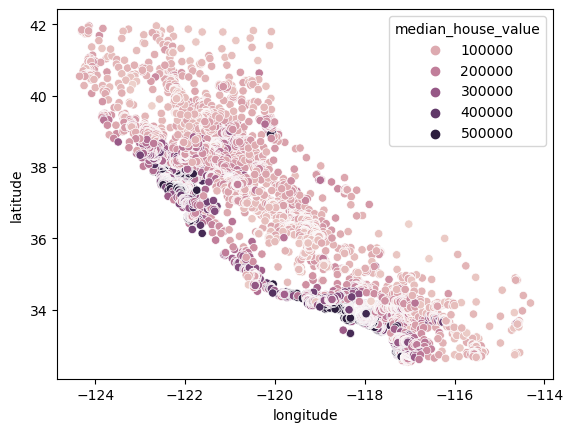

In [132]:
sns.scatterplot(data=california_df, x=california_df['longitude'], y=california_df['latitude'],hue=california_df["median_house_value"])
plt.show()

#This map is good to see, how the prices work in a map of the city

In [133]:
Target= california_df["median_house_value"]
Target

#Chosing the Target to predict

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [134]:
california_df.drop('median_house_value', axis=1, inplace=True)

#Droping the Target from the df

C:\Users\quint\AppData\Local\Temp\ipykernel_21764\4206140625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_df.drop('median_house_value', axis=1, inplace=True)


In [135]:
california_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [136]:
#Now i do a One Hot Enconding using pandas, to deal with the Ocean_proximity Column

one_hot = pd.get_dummies(california_df['ocean_proximity'])

# Know put the new columns in the df, and drop the ocean_proximity column

df = pd.concat([california_df, one_hot], axis=1)
df.drop('ocean_proximity', axis=1, inplace=True)

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [137]:
# If is used a "<" symbol in a column name, it will bring problems later, so I change it
new_name = {'<1H OCEAN': 'more1H_Ocean'}
df.rename(columns=new_name, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,more1H_Ocean,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [145]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(df,Target,test_size=0.3, random_state= 30)

#Spliting the model for training, with 30% of the samples being test

In [146]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

#Training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [140]:
accuracy = model.score(x_test, y_test)
print(f"Accuracy= {accuracy}")

#Seeing the accuracy, that was really good

Accuracy= 0.8290470965729546


In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

media = Target.mean()

rmse_mean= rmse/media *100
mae_mean= (mae/media) *100

print(f"""Root Mean Squared Error= {rmse}, Mean Absolute Error= {mae},
      RMSE= {rmse_mean}% of the price Mean, MAE represents = {mae_mean}% of the Price Mean""")

# Visualizing the errors, that arent really big, but ends up being a really expensive difference, 
# but that comes from the nature of the data. I use means to better undestand the error

Root Mean Squared Error= 47609.44293707476, Mean Absolute Error= 31362.820039285532,
      RMSE= 23.014805790379253% of the price Mean, MAE represents = 15.161051415719859% of the Price Mean


In [142]:
#Know I train a whole model, using the same thing as before, but know using subsample=0.8
# This prevent overfitting and made the model better

x_train,x_test,y_train,y_test= train_test_split(df,Target,test_size=0.3, random_state=30)

model = XGBRegressor(subsample=0.8)

model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse_mean= rmse/media *100
mae_mean= (mae/media) *100


print(f"""Root Mean Squared Error= {rmse}, Mean Absolute Error= {mae},Accuracy= {accuracy},
      RMSE= {rmse_mean}% of the price Mean, MAE represents = {mae_mean}% of the Price Mean""")


Root Mean Squared Error= 47522.224040900044, Mean Absolute Error= 31453.630326646617,Accuracy= 0.8296728827620162,
      RMSE= 22.972643441213243% of the price Mean, MAE represents = 15.204949873640198% of the Price Mean


In [143]:
#Usin the same subsample but with a low learning_rate, made the model slight worse

x_train,x_test,y_train,y_test= train_test_split(df,Target,test_size=0.3, random_state=30)

model = XGBRegressor(subsample=0.8,learning_rate=0.1)

model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse_mean= rmse/media *100
mae_mean= (mae/media) *100

print(f"""Root Mean Squared Error= {rmse}, Mean Absolute Error= {mae},Accuracy= {accuracy},
      RMSE= {rmse_mean}% of the price Mean, MAE represents = {mae_mean}% of the Price Mean""")

Root Mean Squared Error= 47626.02958194843, Mean Absolute Error= 31862.89565469515,Accuracy= 0.8289279593236998,
      RMSE= 23.022823914241492% of the price Mean, MAE represents = 15.402792180978725% of the Price Mean


In [151]:
#As I can see, we need to really drop the learning_rate, to something close to zero to see any difference

x_train,x_test,y_train,y_test= train_test_split(df,Target,test_size=0.3, random_state=30)
model = XGBRegressor(subsample=0.8,learning_rate=0.1)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse_mean= rmse/media *100
mae_mean= (mae/media) *100

print(f"""Root Mean Squared Error= {rmse}, Mean Absolute Error= {mae},Accuracy= {accuracy},
      RMSE= {rmse_mean}% of the price Mean, MAE represents = {mae_mean}% of the Price Mean""")

Root Mean Squared Error= 47626.02958194843, Mean Absolute Error= 31862.89565469515,Accuracy= 0.8289279593236998,
      RMSE= 23.022823914241492% of the price Mean, MAE represents = 15.402792180978725% of the Price Mean
